## Lab2 - TSP Fast solution

https://www.wolframcloud.com/obj/giovanni.squillero/Published/Lab2-tsp.nb

In [415]:
from itertools import combinations
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt
import random

In [416]:
CITIES = pd.read_csv('cities/china.csv', header=None, names=['name', 'lat', 'lon'])

In [417]:
# Save for each couple save -> ( distance, index of compared city )
DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)), dtype=tuple)
for c1, c2 in combinations(CITIES.itertuples(), 2):
    DIST_MATRIX[c1.Index, c2.Index] = (geopy.distance.geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km, c2.Index)
    DIST_MATRIX[c2.Index, c1.Index] = (geopy.distance.geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km, c1.Index)

## Helper Functions

In [418]:
def cost(path):
    circular_path = path + [path[0]]
    tot_dist = 0
    for i in range(len(circular_path)-1):
        tot_dist += DIST_MATRIX[circular_path[i],circular_path[i+1]][0]
    return tot_dist


In [419]:
def print_path(path):
    circular_path = path + [path[0]]
    print("Path:")
    for i in range(len(circular_path)-1):
        print(f"{CITIES.at[circular_path[i],'name']} -> {CITIES.at[circular_path[i+1],'name']} ({DIST_MATRIX[circular_path[i],circular_path[i+1]][0]:.2f}km)")

    print(f"\nNumber of steps: {len(circular_path)-1} , Total lenght: {cost(path):.2f} km")


In [420]:
def visualize_path(path):
    circular_path = path + [path[0]]
    x_coordinates = [CITIES.at[i,'lon'] for i in circular_path]
    y_coordinates = [CITIES.at[i,'lat'] for i in circular_path]

    plt.figure()
    plt.title("Path Quick Resolution")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    plt.plot(x_coordinates,y_coordinates,marker='o', linestyle='-', color='b')
    plt.show()

# Fast Resolution

Computing the closest city starting from the first

In [421]:
def compute_fast_min(start):
    # Search min algorithm
    visited = np.full(len(CITIES), False)
    curr_city_i = start
    visited[curr_city_i] = True
    path = list()
    path.append(curr_city_i)

    while not np.all(visited):

        # Find the city with minimum distance and take the correspondig index to make it the next city
        next_city_tup= np.min(DIST_MATRIX[curr_city_i,np.logical_not(visited)])
        curr_city_i = next_city_tup[1]

        path.append(curr_city_i)
        visited[curr_city_i] = True
    
    return path


Path:
Weihai -> Wendeng (33.59km)
Wendeng -> Rushan (59.18km)
Rushan -> Haiyang (32.50km)
Haiyang -> Laiyang (46.80km)
Laiyang -> Laixi (18.76km)
Laixi -> Pingdu (53.61km)
Pingdu -> Laizhou (42.17km)
Laizhou -> Zhaocheng (46.72km)
Zhaocheng -> Longkou (32.95km)
Longkou -> Penglai (40.08km)
Penglai -> Qixia (58.11km)
Qixia -> Yantai (55.76km)
Yantai -> Jimo (152.63km)
Jimo -> Qingdao (36.63km)
Qingdao -> Jiaozhou (37.74km)
Jiaozhou -> Gaomi (25.04km)
Gaomi -> Anqiu (50.42km)
Anqiu -> Weifang (33.17km)
Weifang -> Changyi (29.12km)
Changyi -> Shouguang (61.09km)
Shouguang -> Qingzhou (29.10km)
Qingzhou -> Yidu (2.04km)
Yidu -> Zibo (39.23km)
Zibo -> Zhoucun (18.83km)
Zhoucun -> Zhangqiu (31.46km)
Zhangqiu -> Boshan (44.53km)
Boshan -> Laiwu (35.44km)
Laiwu -> Xintai (34.49km)
Xintai -> Taian (66.59km)
Taian -> Jinan (53.25km)
Jinan -> Liaocheng (95.99km)
Liaocheng -> Linqing (53.34km)
Linqing -> Nangong (64.34km)
Nangong -> Jizhou (28.10km)
Jizhou -> Hengshui (21.50km)
Hengshui -> Shenzho

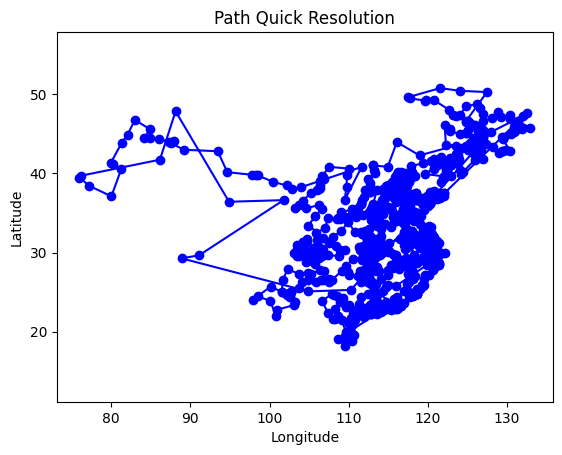

In [422]:
solution = compute_fast_min(0)

for i in range(1,len(CITIES)):
    new_path = compute_fast_min(i)
    if cost(new_path) < cost(solution):
        solution = new_path

print_path(solution)

visualize_path(solution)
